In [14]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# Partie 1 : Inspection des données & Nettoyages des données

<span style="color: #00FFFF">@ Télécharger le fichier de format csv et puis le palce dans un dataframe nommé `loandown`. Les colonnes du fichier sont uniquement séparées par le caractère de tabulation `/t`. </span> 

In [15]:
loandown = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

/home/ying/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<span style="color: #00FFFF"> @ On afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées dans le dataframe `loandown` et sa taille. </span>

In [16]:
print("La taille du dataframe est : ", loandown.shape)
loandown.head()

La taille du dataframe est :  (320772, 162)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color: #00FFFF"> @ Lister toutes les variables: </span>

In [17]:
loandown.columns.tolist();

<span style="color: #00FFFF"> @ Afficher le taux des valeurs  manquantes de chaque variable: </span>

In [18]:
loandown.isna().mean()

code                       0.000072
url                        0.000072
creator                    0.000006
created_t                  0.000009
created_datetime           0.000028
                             ...   
carbon-footprint_100g      0.999165
nutrition-score-fr_100g    0.310382
nutrition-score-uk_100g    0.310382
glycemic-index_100g        1.000000
water-hardness_100g        1.000000
Length: 162, dtype: float64

<span style="color: #00FFFF"> @ Afficher le taux des valeurs  manquantes uniquement les variables >0.3: </span>

In [19]:
l=loandown.isna().mean()
l[l>0.3]
l.index.tolist();

<span style="color: #FF00FF">  @ Nettoyez : filtrer le dataframe `loandown` avec les variables choisies selon l'annalyse nutritionnelle loyenne pour 100 g . </span>

In [20]:
data = loandown[['code','pnns_groups_1','pnns_groups_2', 'url', 'product_name', 'ingredients_text',  'countries_fr', 'image_url',
                 'energy_100g',  'fiber_100g', 'proteins_100g','fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g','nutrition_grade_fr', 'nutrition-score-fr_100g']]

<span style="color: #00FFFF">  </span>

<span style="color: #00FFFF"> @ Afficher la taille et ses 5 premières lignes de dataframe `data`: </span>

In [21]:
print("La taille de dataset data :", data.shape)
data.head()

La taille de dataset data : (320772, 19)


,code,pnns_groups_1,pnns_groups_2,url,product_name,ingredients_text,countries_fr,image_url,energy_100g,fiber_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition_grade_fr,nutrition-score-fr_100g
0,3087,NaN,NaN,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,NaN,NaN,http://world-fr.openfoodfacts.org/produit/0000...,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",États-Unis,NaN,2243.0,3.6,3.57,28.57,28.57,64.29,14.29,0.00000,0.000,d,14.0
2,4559,NaN,NaN,http://world-fr.openfoodfacts.org/produit/0000...,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",États-Unis,NaN,1941.0,7.1,17.86,17.86,0.00,60.71,17.86,0.63500,0.250,b,0.0
3,16087,NaN,NaN,http://world-fr.openfoodfacts.org/produit/0000...,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",États-Unis,NaN,2540.0,7.1,17.86,57.14,5.36,17.86,3.57,1.22428,0.482,d,12.0
4,16094,NaN,NaN,http://world-fr.openfoodfacts.org/produit/0000...,Organic Polenta,Organic polenta,États-Unis,NaN,1552.0,5.7,8.57,1.43,NaN,77.14,NaN,NaN,NaN,NaN,NaN


<span style="color: #00FFFF"> @ Afficher les types de toutes les variables : </span>

In [22]:
list_types=data.dtypes

In [23]:
list_types

code                        object
pnns_groups_1               object
pnns_groups_2               object
url                         object
product_name                object
ingredients_text            object
countries_fr                object
image_url                   object
energy_100g                float64
fiber_100g                 float64
proteins_100g              float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
salt_100g                  float64
sodium_100g                float64
nutrition_grade_fr          object
nutrition-score-fr_100g    float64
dtype: object

In [24]:
feature_numerique=['energy_100g', 'fiber_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 
                   'carbohydrates_100g','sugars_100g', 'salt_100g','sodium_100g','nutrition-score-fr_100g']

feature_categorielle=['code', 'pnns_groups_1','pnns_groups_2','url', 'product_name', 'ingredients_text', 
                      'nutrition_grade_fr', 'countries_fr', 'image_url']

In [25]:
data[data[feature_numerique].isna().mean(axis=1)==1]

,code,pnns_groups_1,pnns_groups_2,url,product_name,ingredients_text,countries_fr,image_url,energy_100g,fiber_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition_grade_fr,nutrition-score-fr_100g
0,3087,NaN,NaN,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,unknown,unknown,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,NaN,France,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,NaN,NaN,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,unknown,unknown,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,1071894,Cereals and potatoes,Bread,http://world-fr.openfoodfacts.org/produit/0000...,Flute,Wheat,Royaume-Uni,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320765,9935010000003,Fish Meat Eggs,Processed meat,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,"viande d'oie, graisse de canard, épices, sel, ...",France,http://fr.openfoodfacts.org/images/products/99...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320766,99410148,Salty snacks,Nuts,http://world-fr.openfoodfacts.org/produit/9941...,NaN,NaN,Royaume-Uni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320767,9948282780603,NaN,NaN,http://world-fr.openfoodfacts.org/produit/9948...,Tomato & ricotta,NaN,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,Salty snacks,Appetizers,http://world-fr.openfoodfacts.org/produit/9970...,乐吧泡菜味薯片,NaN,Chine,http://fr.openfoodfacts.org/images/products/99...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color: #FF00FF">  @ Nettoyez : les doublons du dataframe `data` dans la colonne `code`. </span>

In [26]:
data['code'].duplicated().sum()

133

In [27]:
data.drop_duplicates(subset ="code", keep = 'first', inplace=True)
data.shape

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(320639, 19)

<span style="color: #FF00FF">  @ Nettoyez : On s'intéresse uniquement les produits français. </span>

In [28]:
data['countries_fr'].value_counts()

États-Unis                                         172911
France                                              94386
Suisse                                              14953
Allemagne                                            7869
Espagne                                              5009
                                                    ...  
Allemagne,Pays-Bas,Espagne,Royaume-Uni                  1
France,Hongrie                                          1
Chine,France,Allemagne                                  1
Arménie,France,Allemagne,Italie,Roumanie,Russie         1
Chine,Hong Kong                                         1
Name: countries_fr, Length: 717, dtype: int64

In [29]:
data=data.loc[data['countries_fr']=='France']

<span style="color: #00FFFF">@ Détection d'outliers : Un describe peut potentiellement nous aider dans un premier temps :
- le Nutri-Score a des valeurs suivantes pour les différentes lettres :
    + Nutri-Score A : -15 à -1
    + Nutri-Score B : 0 à 2
    + Nutri-Score C : 3 à 10
    + Nutri-Score D : 11 à 18
    + Nutri-Score E : 19 à 40 
    
 

</span>

In [30]:
data.describe()

,energy_100g,fiber_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,6.143100e+04,43643.000000,61181.000000,44590.000000,59387.000000,44178.000000,59485.000000,59541.000000,59538.000000,58498.000000
mean,1.168110e+03,2.522659,7.794332,13.279028,5.386130,27.305589,13.235242,1.161264,0.457212,8.601508
std,1.316085e+04,4.633843,7.930622,16.985231,8.538718,27.307431,19.029132,4.291403,1.689509,9.018037
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,-15.000000
25%,4.270000e+02,0.000000,1.800000,1.300000,0.300000,4.000000,1.000000,0.080000,0.031496,1.000000
50%,1.028000e+03,1.300000,6.000000,6.800000,1.900000,14.000000,4.000000,0.570000,0.224409,8.000000
75%,1.640000e+03,3.200000,11.000000,21.000000,7.300000,52.700000,17.000000,1.250000,0.492126,15.000000
max,3.251373e+06,178.000000,100.000000,380.000000,210.000000,190.000000,105.000000,211.000000,83.000000,40.000000


<span style="color: #00FFFF"> @ On remplace les valeurs aberrantes de la colonne `energy_100g` par un NAN : </span>

In [31]:
data.loc[data['energy_100g']<0]=np.nan;
data.loc[data['energy_100g']>4000]=np.nan;

<span style="color: #00FFFF"> @ On remplace les valeurs aberrantes par un NAN, sauf les colonnes `energy_100g` et `nutrition-score-fr_100g` : </span>

In [32]:
def supp_aberrante_describe (feature_numerique, data):
   feature_numerique.remove('energy_100g')
   feature_numerique.remove('nutrition-score-fr_100g')
   
   for i in range(len(feature_numerique)):
       data.loc[data[feature_numerique[i]]>100]=np.nan
       data.loc[data[feature_numerique[i]]<0]=np.nan
   return data

In [33]:
data = supp_aberrante_describe(feature_numerique,data);

In [34]:
print("La taille de dataframe data ", data.shape)
data.describe()

La taille de dataframe data  (94386, 19)


,energy_100g,fiber_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,61338.000000,43559.000000,61089.000000,44562.000000,59295.000000,44149.000000,59392.000000,59450.000000,59447.000000,58408.000000
mean,1105.291296,2.516618,7.794212,13.266547,5.381919,27.283802,13.213343,1.154746,0.454647,8.586974
std,772.015320,4.538102,7.929116,16.886999,8.493160,27.273430,18.995948,4.173791,1.643262,9.012660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,425.000000,0.000000,1.800000,1.300000,0.300000,3.960000,1.000000,0.080000,0.031496,1.000000
50%,1025.000000,1.300000,6.000000,6.800000,1.900000,14.000000,4.000000,0.570000,0.224409,8.000000
75%,1636.000000,3.200000,11.000000,21.000000,7.300000,52.600000,17.000000,1.250000,0.492126,15.000000
max,4000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370079,40.000000


<span style="color: #00FFFF"> @ On remplace les valeurs aberrantes par un NAN avec la méthode interquartile: </span>

In [35]:
def supp_aberrante_interquartile (feature_numerique, data):
   
   for i in range(len(feature_numerique)):
       #On calcule Q1
       q1=data[feature_numerique[i]].quantile(q=0.25)
       #On calcule Q3
       q3=data[feature_numerique[i]].quantile(q=0.75)
       
       #On calcule l'écart interquartile (IQR)
       IQR=q3-q1
       
       #On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
       borne_inf = q1-1.5*IQR
       
       #On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
       borne_sup = q3 +1.5*IQR
       
       #On remplace des valeurs à l'extérieur de la borne inférieure et supérieure par un NAN.
       data.loc[data[feature_numerique[i]]>borne_sup]=np.nan
       data.loc[data[feature_numerique[i]]<borne_inf]=np.nan
      
   return data

In [36]:
data = supp_aberrante_interquartile(feature_numerique, data)
data.describe()

,energy_100g,fiber_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,41788.000000,30190.000000,41591.000000,31206.000000,39972.000000,30916.000000,40069.000000,40155.000000,40152.000000,39499.000000
mean,844.589011,1.803513,6.532897,8.119165,2.735195,24.200033,7.393276,0.696687,0.274305,5.354363
std,661.042694,1.902741,5.738148,9.309417,3.525952,25.042931,8.851619,0.667328,0.262728,7.643788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,292.000000,0.000000,1.600000,0.900000,0.200000,4.800000,1.000000,0.090000,0.035433,0.000000
50%,636.050000,1.300000,5.500000,4.200000,1.200000,13.000000,3.500000,0.600000,0.236220,3.000000
75%,1368.000000,2.900000,9.600000,12.800000,3.700000,42.000000,11.000000,1.100000,0.433071,11.000000
max,4000.000000,8.000000,23.300000,48.300000,14.930000,100.000000,36.400000,2.755900,1.085000,33.000000


<span style="color: #00FFFF"> @ Valeurs aberrantes : Les valeurs de la colonne `saturated-fat_100g` est supérieur aux valeurs de la colonne `fat_100g` : </span>

In [37]:
data.loc[data['saturated-fat_100g']>data['fat_100g']]=np.nan
data.loc[data['sugars_100g']>data['carbohydrates_100g']]=np.nan
data.loc[data['sodium_100g']>data['salt_100g']]=np.nan
data.describe()

,energy_100g,fiber_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,41703.000000,30122.000000,41507.000000,31123.000000,39887.000000,30831.000000,39984.000000,40070.000000,40067.000000,39416.000000
mean,845.259638,1.805045,6.534043,8.127817,2.735319,24.230790,7.392807,0.697020,0.274436,5.356759
std,661.288947,1.903002,5.737116,9.311806,3.525349,25.049563,8.853798,0.667416,0.262763,7.643548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,293.000000,0.000000,1.600000,0.900000,0.200000,4.800000,1.000000,0.090000,0.035433,0.000000
50%,638.000000,1.300000,5.500000,4.200000,1.200000,13.000000,3.500000,0.600000,0.236220,3.000000
75%,1370.500000,2.900000,9.600000,12.800000,3.700000,42.000000,11.000000,1.100000,0.433071,11.000000
max,4000.000000,8.000000,23.300000,48.300000,14.930000,100.000000,36.400000,2.755900,1.085000,33.000000


<span style="color: #00FFFF"> @ NAN : Affichant les taux des valeurs manquantes : </span>

In [38]:
data.isna().mean()

code                       0.210116
pnns_groups_1              0.501610
pnns_groups_2              0.480442
url                        0.210116
product_name               0.283252
ingredients_text           0.599549
countries_fr               0.210116
image_url                  0.586750
energy_100g                0.558165
fiber_100g                 0.680864
proteins_100g              0.560242
fat_100g                   0.670258
saturated-fat_100g         0.577406
carbohydrates_100g         0.673352
sugars_100g                0.576378
salt_100g                  0.575467
sodium_100g                0.575498
nutrition_grade_fr         0.582396
nutrition-score-fr_100g    0.582396
dtype: float64

<span style="color: #00FFFF"> @ NAN : Remplacer les valeurs manquantede de la colonne `fiber_100` par `0`. On supprimer d'abord toutes les lignes qui ne contient que les Nan. </span>

In [39]:
index_with_nan = data.index[data.isnull().mean(axis=1)==1]
data.drop(index_with_nan,0, inplace=True);
print("La taille de dataset data :", data.shape)

La taille de dataset data : (74554, 19)


/tmp/ipykernel_213/1028181460.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(index_with_nan,0, inplace=True);


In [40]:
data.loc[data['fiber_100g'].isna(),'fiber_100g']=0;
data.isna().mean();

<span style="color: #00FFFF"> @ NAN : Compléter les valeurs manquantede des colonnes `'energy_100g', 'proteins_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g'` par un `IterativeImputer`. </span>

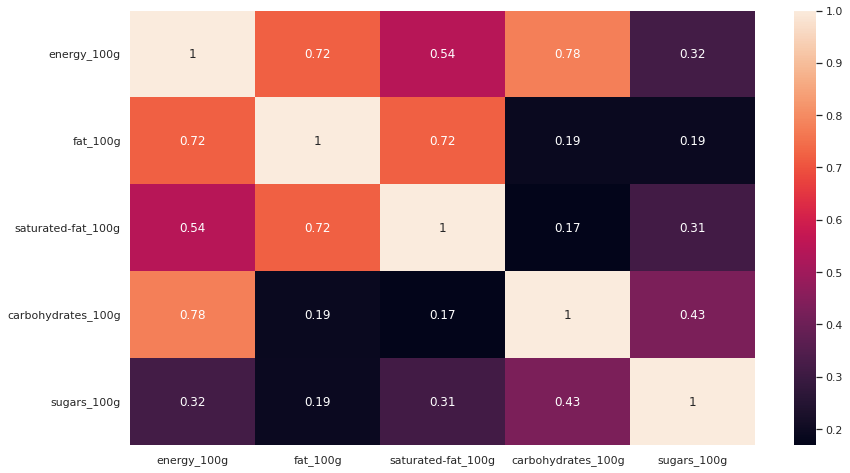

In [41]:
sns.set()
plt.figure(figsize = (14,8))
sns.heatmap(data[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g' ]].corr(),annot = True);

In [42]:
imputer = IterativeImputer()
imputer.fit(data[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g' ]])
data[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g' ]]=imputer.transform(data[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g' ]])
data.isna().mean();

/home/ying/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [43]:
imputer_salt = IterativeImputer()
imputer_salt.fit(data[['salt_100g', 'sodium_100g']])
data[['salt_100g', 'sodium_100g' ]]=imputer_salt.transform(data[['salt_100g', 'sodium_100g']])
data.isna().mean()

code                       0.000000
pnns_groups_1              0.369035
pnns_groups_2              0.342235
url                        0.000000
product_name               0.092591
ingredients_text           0.493025
countries_fr               0.000000
image_url                  0.476822
energy_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.443263
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
salt_100g                  0.000000
sodium_100g                0.000000
nutrition_grade_fr         0.471309
nutrition-score-fr_100g    0.471309
dtype: float64

<span style="color: #00FFFF"> @ Valeurs aberrantes : Après un `IteractiveImputer`, On remplace les valeurs aberrantes par `0`, dans les colonnes `'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g'` : </span>

In [44]:
data.describe()

,energy_100g,fiber_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,74554.000000,74554.000000,41507.000000,74554.000000,74554.000000,74554.000000,74554.000000,74554.000000,7.455400e+04,39416.000000
mean,850.579585,0.729291,6.534043,8.254756,2.764499,24.902438,7.417974,0.697020,2.744171e-01,5.356759
std,497.424913,1.499226,5.737116,6.959956,2.648806,18.719246,6.535678,0.489292,1.926347e-01,7.643548
min,0.000000,0.000000,0.000000,-22.107973,-6.821179,-58.257147,-13.130241,0.000000,-3.354745e-07,-14.000000
25%,544.000000,0.000000,1.600000,3.500000,0.900000,12.100000,3.000000,0.500000,1.968504e-01,0.000000
50%,850.579585,0.000000,5.500000,8.254756,2.764499,24.902438,7.417974,0.697020,2.744171e-01,3.000000
75%,850.579585,0.600000,9.600000,8.254756,2.764499,24.902438,7.417974,0.697020,2.744171e-01,11.000000
max,4000.000000,8.000000,23.300000,73.789408,14.956948,140.250836,46.976187,2.755900,1.085000e+00,33.000000


In [45]:
# Supprimer les nouveaux valeurs aberrantes:
for i in ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
          'salt_100g', 'sodium_100g']:
    data=data[data[i]>0]
    data=data[data[i]<100]

<span style="color: #00FFFF"> @ NAN: On supprime les valeurs NAN, dans les colonnes `pnns_groups_1` & `nutrition_grade_fr` </span>

In [46]:
# supprimer les NAN dans la colonne `pnns_groups_1` et `nutritions_grade_fr` et `proteins_100g`

data=data.drop((data.loc[data['pnns_groups_1'].isna()]).index)
data=data.drop((data.loc[data['nutrition_grade_fr'].isna()]).index)
data=data.drop((data.loc[data['proteins_100g'].isna()]).index)

In [47]:
# on reindexe
data = data.reset_index(drop = True)

In [48]:
data.shape

(24213, 19)

In [49]:
data.describe()

,energy_100g,fiber_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000
mean,938.268235,1.505529,7.386114,9.510788,3.235448,26.401455,7.659073,0.830733,0.327060,5.891174
std,623.887628,1.870011,5.326431,9.172439,3.592719,24.773481,9.347312,0.655259,0.257976,7.822768
min,0.000000,0.000000,0.000000,0.005000,0.000100,0.010000,0.000100,0.000005,0.000002,-14.000000
25%,418.000000,0.000000,3.200000,2.400000,0.540000,5.800000,1.200000,0.160000,0.062992,0.000000
50%,780.000000,0.700000,6.400000,6.400000,1.900000,15.879961,3.300000,0.775000,0.305118,4.000000
75%,1481.000000,2.500000,10.200000,14.400000,4.500000,49.000000,11.000000,1.270000,0.500000,12.000000
max,3770.000000,8.000000,23.300000,48.300000,14.900000,98.440000,36.400000,2.750000,1.082677,29.000000


In [50]:
data.isna().mean()

code                       0.000000
pnns_groups_1              0.000000
pnns_groups_2              0.000000
url                        0.000000
product_name               0.007104
ingredients_text           0.128072
countries_fr               0.000000
image_url                  0.296741
energy_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
salt_100g                  0.000000
sodium_100g                0.000000
nutrition_grade_fr         0.000000
nutrition-score-fr_100g    0.000000
dtype: float64

In [51]:
data.dtypes

code                        object
pnns_groups_1               object
pnns_groups_2               object
url                         object
product_name                object
ingredients_text            object
countries_fr                object
image_url                   object
energy_100g                float64
fiber_100g                 float64
proteins_100g              float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
salt_100g                  float64
sodium_100g                float64
nutrition_grade_fr          object
nutrition-score-fr_100g    float64
dtype: object

<span style="color: #00FFFF"> @ On tranforme la lettre miniscule de la variable `nutrition_grade_fr` en majuscule. </span>

In [52]:
data['nutrition_grade_fr']=data['nutrition_grade_fr'].astype(str).str.upper() 

In [53]:
data['nutrition_grade_fr'].values

array(['D', 'D', 'D', ..., 'B', 'A', 'C'], dtype=object)